<a href="https://colab.research.google.com/github/gvictor00/alura/blob/main/Introdu%C3%A7%C3%A3o_a_Machine_Learning_e_Classifica%C3%A7%C3%A3o_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#!pip install seaborn==0.9.0

In [45]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
# Carrega as 5 primeiras linhas da tabela
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [46]:
to_rename = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizados'
}

dados = dados.rename(columns = to_rename)
dados.head()

,nao_finalizados,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [47]:
# Ajusta o dataset para ficar semanticamente melhor

troca = {
    1 : 0, 
    0 : 1
}

dados['finalizado'] = dados.nao_finalizados.map(troca)
dados.head()

,nao_finalizados,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


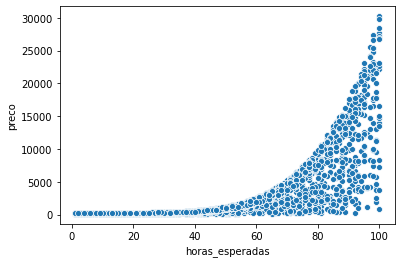

In [48]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

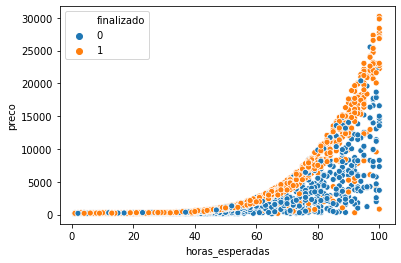

In [49]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

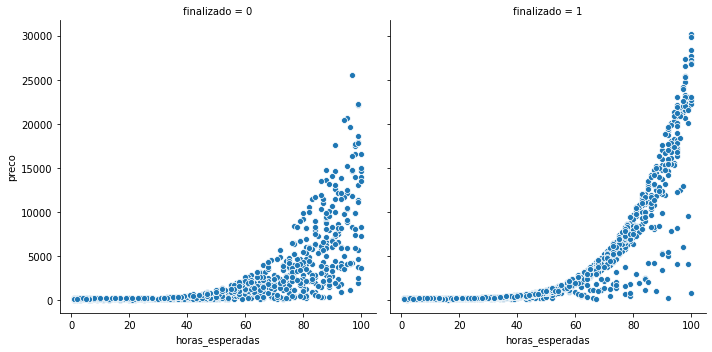

In [50]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

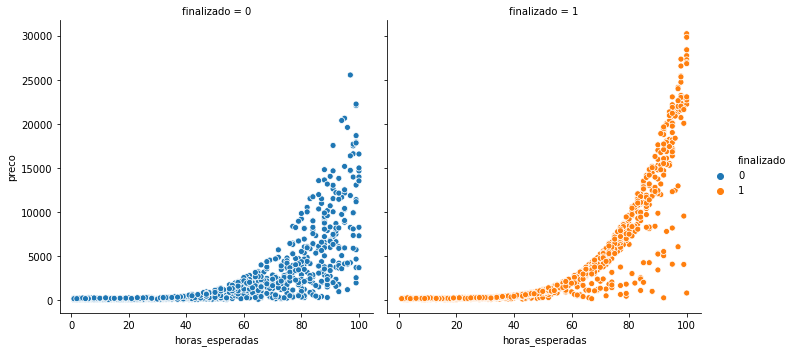

In [51]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", hue="finalizado", data=dados)

In [52]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [61]:
from sklearn.model_selection import train_test_split

# semente para ser utilizada como referência, para remover a aleatoriedade
# da separação dos dados
# SEED = 20
SEED = 10 # Muda o seed para ter uma reta diferente, no fim do código

# Função responsável por separar aleatoriamente o conjunto de dados
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED, test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print("A acuracia foi %.2f%%" % (taxa_de_acerto * 100))

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acuracia foi 50.37%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [62]:
# Cria o baseline da função
import numpy as np
previsoes_de_baseline = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_baseline) * 100
print("A acurácia do Baseline foi %.2f%%" % acuracia)

A acurácia do Baseline foi 52.96%


Realizando análise sobre o treino e teste

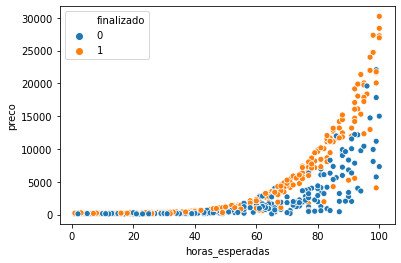

In [63]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [64]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 101 30223


In [65]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [66]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [67]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

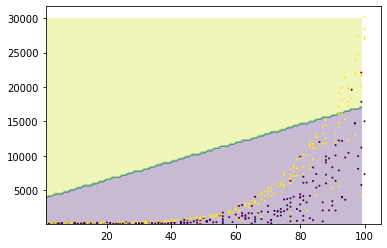

In [68]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# decision boundary -> curva de decisão do algoritmo